In [1]:
import io

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pulse2percept as p2p
from PIL import Image

In [2]:
df = pd.read_parquet("../datasets/MNIST/train.parquet")
df.shape

(60000, 2)

In [3]:
test = pd.read_parquet("../datasets/MNIST/test.parquet")
test.shape

(10000, 2)

In [4]:
print(df)

                                                   image  label
0      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      5
1      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      0
2      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      4
3      {'bytes': b"\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      1
4      {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      9
...                                                  ...    ...
59995  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      8
59996  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      3
59997  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      5
59998  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      6
59999  {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...      8

[60000 rows x 2 columns]


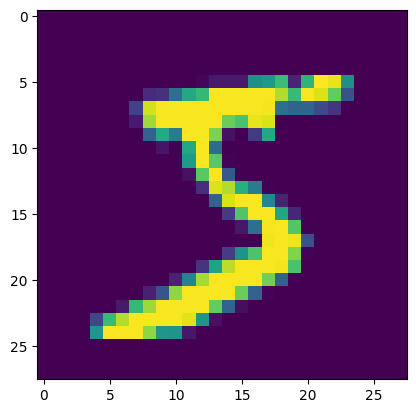

In [5]:
%matplotlib inline
image = Image.open(io.BytesIO(df["image"].iloc[0]['bytes']))
plt.imshow(image)

In [6]:
img = np.array(image)
img.shape

(28, 28)

<Axes: >

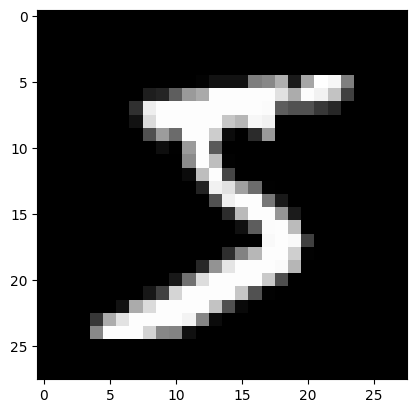

In [7]:
stim = p2p.stimuli.ImageStimulus(img)
stim.plot()

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

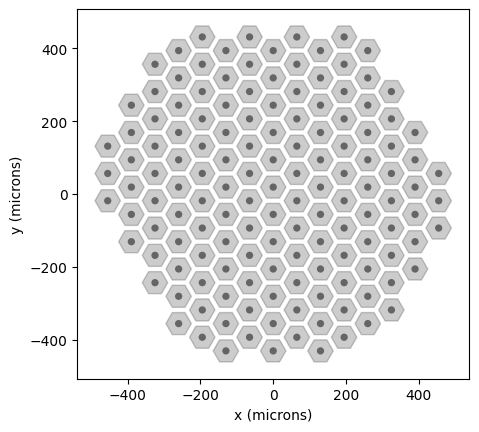

In [9]:
implant = p2p.implants.PRIMA75()
implant.plot()

<Axes: xlabel='x (microns)', ylabel='y (microns)'>

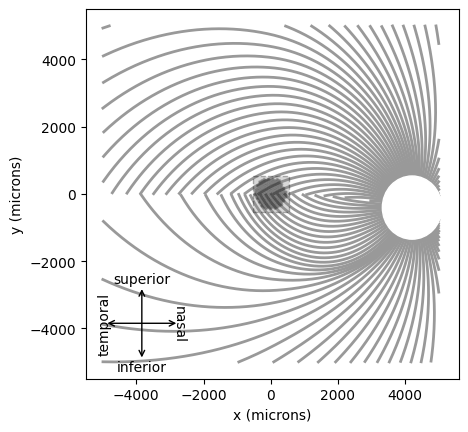

In [15]:
model = p2p.models.AxonMapModel(xrange=(-2, 2), yrange=(-2, 2), xystep=0.15, rho=20, axlambda=200)
model.build()
model.plot()
implant.plot()

In [16]:
implant.stim = stim.resize(implant.shape)
percept = model.predict_percept(implant)
frame = percept.max(axis='frames')
frame

array([[0.00e+00, 0.00e+00, ..., 5.56e-43, 0.00e+00],
       [0.00e+00, 0.00e+00, ..., 3.99e-37, 4.75e-43],
       ...,
       [3.95e-26, 5.53e-21, ..., 0.00e+00, 0.00e+00],
       [4.64e-38, 1.10e-31, ..., 0.00e+00, 0.00e+00]], dtype=float32)

In [17]:
print(frame.shape)

(28, 28)


In [18]:
np.max(frame)

0.8006934

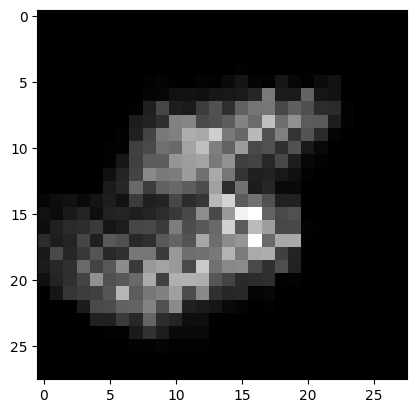

In [19]:
plt.imshow(frame, cmap='gray')

0.7204643

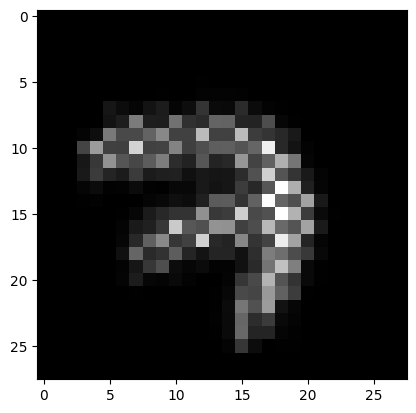

In [26]:
file = np.load('Out/prima75scoreboard/traindata.npz')
plt.imshow(file['data'][5000], cmap='grey')
np.max(file['data'][5000])

In [28]:
print(file['data'].shape)

(60000, 28, 28)


In [29]:
file = np.load('Out/prima75scoreboard/trainlabels.npz')
print(file['data'].shape)

(60000,)


In [23]:
def compare_npz_files(file1, file2, tol=1e-8):
    # Load the .npz files
    data1 = np.load(file1)
    data2 = np.load(file2)

    # Check if the keys are the same
    if set(data1.keys()) != set(data2.keys()):
        print("The files have different keys.")
        return False

    # Compare each array
    for key in data1.keys():
        array1 = data1[key]
        array2 = data2[key]

        if array1.dtype != array2.dtype:
            print(f"Arrays '{key}' have different dtypes.")
            print(array1.dtype)
            print(array2.dtype)
            return False

        if array1.shape != array2.shape:
            print(f"Arrays '{key}' have different shapes.")
            print(array1.shape)
            print(array2.shape)
            return False

        if not np.allclose(array1, array2, atol=tol):
            print(f"Arrays '{key}' are not equal within tolerance.")
            return False

    print("The files contain the same data.")
    return True

# Example usage
file1 = 'Out/prima75scoreboard/traindata.npz'
file2 = 'Out/traindata.npz'
compare_npz_files(file1, file2)

The files contain the same data.


True